# Birthrate Project

Name: Otoo Matthias Anum


In [1]:
import pandas as pd

# Loading database


In [349]:
births=pd.read_csv('data-table.csv', index_col=0)
# reading the the csv file into pandas 
print(births.head())

     STATE  FERTILITY RATE  BIRTHS                                       URL
YEAR                                                                        
2021    AL            59.5   58054     /nchs/pressroom/states/alabama/al.htm
2021    AK            64.9    9367      /nchs/pressroom/states/alaska/ak.htm
2021    AZ            55.5   77916     /nchs/pressroom/states/arizona/az.htm
2021    AR            61.7   35965    /nchs/pressroom/states/arkansas/ar.htm
2021    CA            52.8  420608  /nchs/pressroom/states/california/ca.htm


# Cleaning dataset

In [328]:
births.drop(columns=['URL'],inplace=True)# Removing the URL column from the dataset

In [329]:
print(births.head())

     STATE  FERTILITY RATE  BIRTHS
YEAR                              
2021    AL            59.5   58054
2021    AK            64.9    9367
2021    AZ            55.5   77916
2021    AR            61.7   35965
2021    CA            52.8  420608


In [330]:
number_of_births=births.drop(columns=['FERTILITY RATE']) # Removing the Fertility rate from the dataset
print(number_of_births.head())

     STATE  BIRTHS
YEAR              
2021    AL   58054
2021    AK    9367
2021    AZ   77916
2021    AR   35965
2021    CA  420608


In [331]:
number_of_births =number_of_births.pivot_table(index='STATE', columns='YEAR', aggfunc='sum')

In [351]:
newdata = pd.DataFrame(number_of_births)
print(newdata.head())

       BIRTHS                                                                  \
YEAR     2005    2014    2015    2016    2017    2018    2019    2020    2021   
STATE                                                                           
AK      10459   11392   11282   11209   10445   10086    9822    9469    9367   
AL      60453   59422   59657   59151   58941   57761   58615   57647   58054   
AR      39208   38511   38886   38274   37520   37018   36564   35251   35965   
AZ      96199   86887   85351   84520   81872   80723   79375   76947   77916   
CA     548882  502879  491748  488827  471658  454920  446479  420259  420608   

      Total_Births  
YEAR                
STATE               
AK           93531  
AL          529701  
AR          337197  
AZ          749790  
CA         4246260  


In [93]:
#Creating a new DataFrame to store the sum of births for each year
sum_of_births = pd.DataFrame(index=['Total'], columns=newdata.columns[0:])
# Using a for loop to calculate the sum of births for each year

for year in sum_of_births.columns:
    sum_of_births[year] = newdata[year].sum()

# Calculate the increase or decrease in values

change_in_values = sum_of_births.diff(axis=1).fillna(0)

# Displaying the result
print(sum_of_births)

        BIRTHS                                                                 \
YEAR      2005     2014     2015     2016     2017     2018     2019     2020   
Total  4130378  3978567  3968919  3936017  3845940  3782500  3738461  3604773   

                
YEAR      2021  
Total  3655632  


# Data Visualization

In [333]:
import matplotlib.pyplot as plt

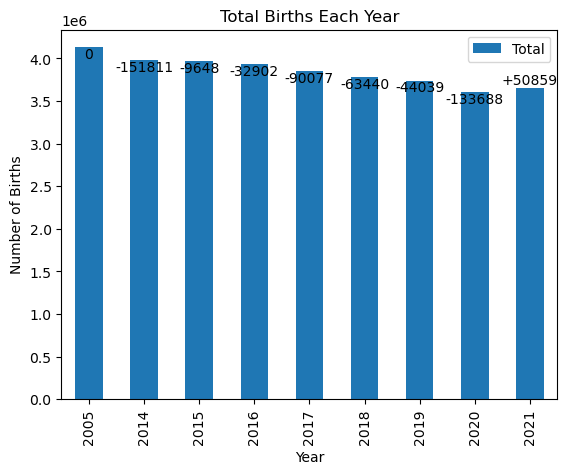

In [334]:
fig, ax = plt.subplots()
sum_of_births.T.plot(kind='bar',ax=ax)
plt.title('Total Births Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Births')

# Removing 'BIRTHS' from x-axis labels
new_labels = [str(label[1]) if isinstance(label, tuple) else label for label in sum_of_births.columns]
ax.set_xticklabels(new_labels)

for i, value in enumerate(change_in_values.iloc[0]):
    vertical_position = sum_of_births.iloc[0, i] + 1000 if value > 0 else sum_of_births.iloc[0, i] - 1000
    text = f'+{int(value)}' if value > 0 else f'{int(value)}'
    ax.text(i, vertical_position, text, ha='center', va='bottom' if value > 0 else 'top')

plt.show()

# States with the highest births over the years

In [335]:
# Calculate total births for each state across the years
newdata['Total_Births'] = newdata.sum(axis=1)
#print(newdata['Total_Births'])

In [336]:
# Extracting data for plotting
newdata_reset = newdata.reset_index()
states = newdata_reset['STATE']
total_births = newdata_reset['Total_Births']

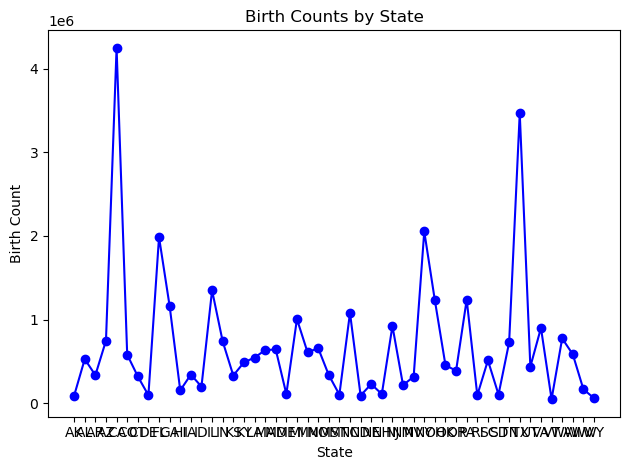

In [337]:
plt.plot(states, total_births, 'bo-', label='Total Births')
# Set the title and axis labels
plt.title('Birth Counts by State')
plt.xlabel('State')
plt.ylabel('Birth Count')
# Adjust layout for better presentation
plt.tight_layout()
# Display the plot
plt.show()

# Birth Trends Visualization

In [338]:
# Transpose the DataFrame for better compatibility with plotting
newdata_transposed = newdata.T
# Convert the index (years) to numeric values
years = pd.to_numeric(newdata_transposed.index.get_level_values('YEAR'), errors='coerce').dropna().astype(int)

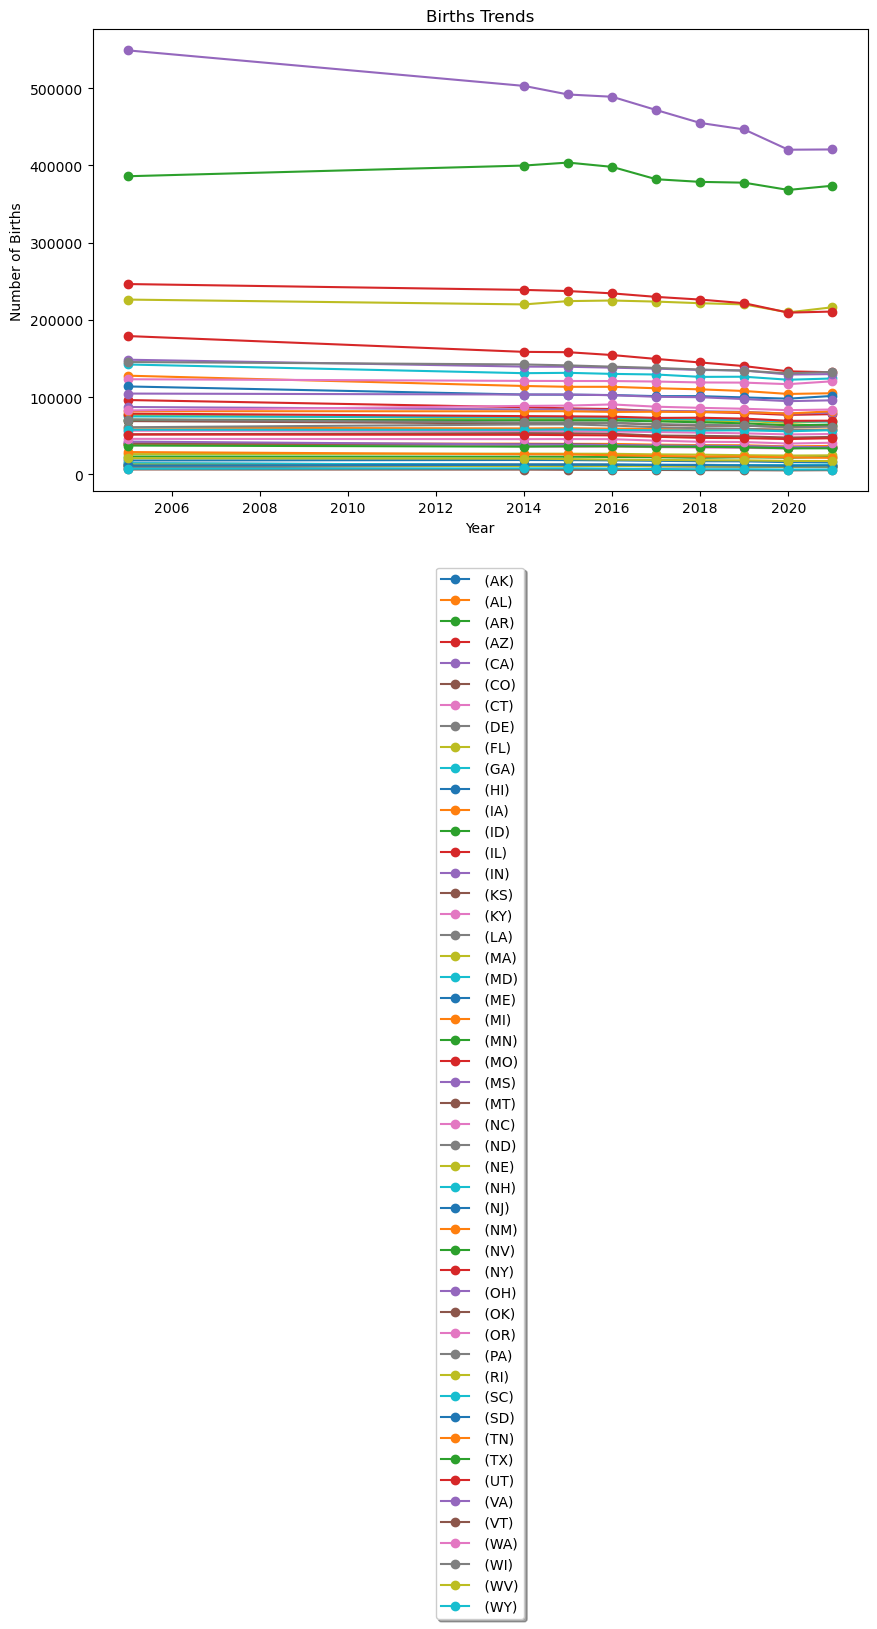

In [339]:
# Plot the trend for the current data
plt.figure(figsize=(10, 6))
for state in newdata_transposed.columns:
    # Ensure that the lengths of 'years' and 'newdata_transposed[state]' are the same
    plt.plot(years[:len(newdata_transposed[state])], newdata_transposed[state][:len(years)], label=f' ({state})', linestyle='solid', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Births Trends')
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.15),fancybox=True, shadow=True)
plt.show()


# Making trend prediction for the next decades using Machine learning algorithm

In [340]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [341]:
# Extract the data for training and testing for all states
X_train = years[1:8].values.reshape(-1, 1)

# Initialize an empty array to store y_train for all states
y_train_all_states = []

# Loop through all states and append their data to y_train_all_states
for state_data in newdata_transposed.columns:
    y_train_all_states.append(newdata_transposed[state_data].values[1:8])

# Stack y_train_all_states to create a 2D array
y_train_all_states = pd.DataFrame(y_train_all_states).values.T



In [342]:
# Train the linear regression model for each state
models = {}
for idx, state in enumerate(newdata_transposed.columns):
    model = LinearRegression()
    model.fit(X_train, y_train_all_states[:, idx])
    models[state] = model


In [343]:
# Predict for the next decade (2020-2031) for all states
X_test = range(2020, 2031)
X_test = pd.Series(X_test).astype(int).values.reshape(-1, 1)


# Prediction Visualization

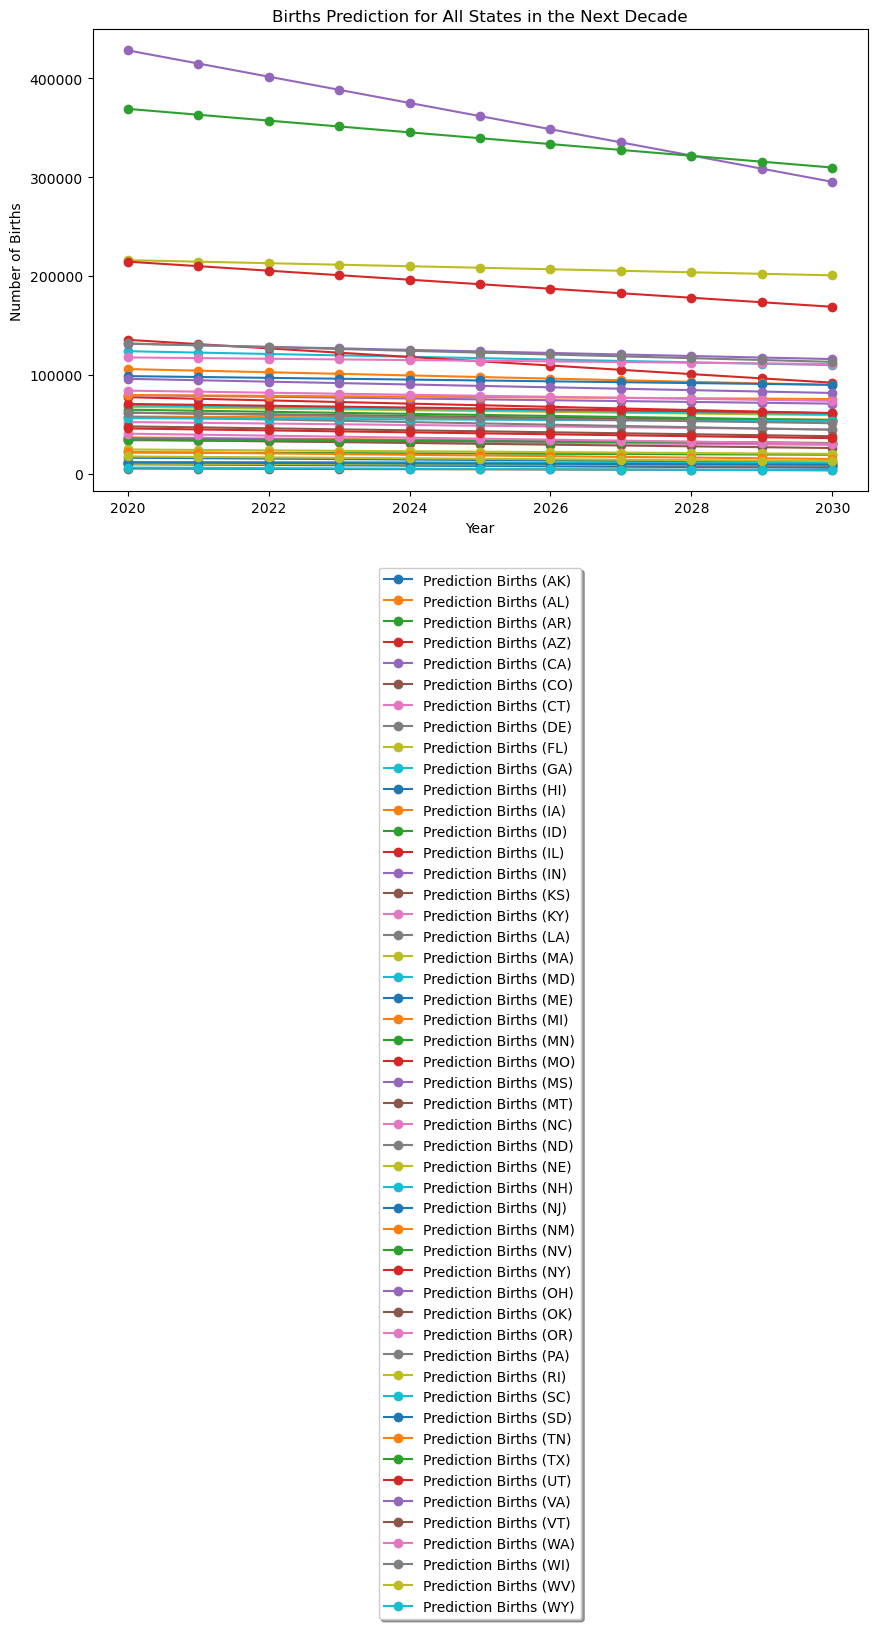

In [344]:
# Plot the results for all states
plt.figure(figsize=(10, 6))
for state, model in models.items():
    y_pred = model.predict(X_test)
    plt.plot(range(2020, 2031), y_pred, label=f'Prediction Births ({state})', linestyle='solid', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Births Prediction for All States in the Next Decade')
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.15),fancybox=True, shadow=True)